**Import Package**

In [252]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

**Access file**

In [255]:
read_file = pd.read_csv('bim_ai_civil_engineering_dataset.csv')

In [257]:
# viewing the first 5 row of data
read_file.head()

,Project_ID,Project_Type,Location,Start_Date,End_Date,Planned_Cost,Actual_Cost,Cost_Overrun,Planned_Duration,Actual_Duration,...,Energy_Consumption,Material_Usage,Labor_Hours,Equipment_Utilization,Accident_Count,Safety_Risk_Score,Image_Analysis_Score,Anomaly_Detected,Completion_Percentage,Risk_Level
0,PJT_1,Tunnel,Houston,2020-01-01,2021-09-26,12260784,1.505450e+07,2.793720e+06,699,813.914852,...,25202.994687,244.843310,6602,76.300184,8,6.192198,52.988330,0,95.006343,High
1,PJT_2,Dam,Houston,2020-01-02,2020-12-06,2369277,3.507054e+06,1.137777e+06,269,384.118221,...,49066.172542,263.123025,7121,63.527671,5,2.134473,50.885745,0,25.294824,Low
2,PJT_3,Building,Houston,2020-01-03,2021-12-05,23299783,2.169213e+07,-1.607656e+06,899,1081.777915,...,48192.547163,608.985023,9956,47.099444,2,3.113728,93.905836,0,97.478830,Medium
3,PJT_4,Dam,Houston,2020-01-04,2022-04-12,24499306,2.946966e+07,4.970354e+06,809,974.565655,...,19811.151750,673.574344,3725,86.846394,5,4.070101,90.454316,1,95.098131,High
4,PJT_5,Dam,Seattle,2020-01-05,2022-02-12,1749971,2.329338e+06,5.793670e+05,354,347.990127,...,44866.565169,765.476122,4368,61.827163,6,2.759351,78.391069,0,43.624985,Low


**Data Cleaning**

In [260]:
# to check data type
read_file.dtypes

Project_ID                object
Project_Type              object
Location                  object
Start_Date                object
End_Date                  object
Planned_Cost               int64
Actual_Cost              float64
Cost_Overrun             float64
Planned_Duration           int64
Actual_Duration          float64
Schedule_Deviation       float64
Vibration_Level          float64
Crack_Width              float64
Load_Bearing_Capacity    float64
Temperature              float64
Humidity                 float64
Weather_Condition         object
Air_Quality_Index          int64
Energy_Consumption       float64
Material_Usage           float64
Labor_Hours                int64
Equipment_Utilization    float64
Accident_Count             int64
Safety_Risk_Score        float64
Image_Analysis_Score     float64
Anomaly_Detected           int64
Completion_Percentage    float64
Risk_Level                object
dtype: object

In [262]:
# change the date type of date from object to date -> for in case usage
read_file['Start_Date'] = pd.to_datetime(read_file['Start_Date'])
read_file['End_Date'] = pd.to_datetime(read_file['End_Date'])

# to check data type of date
read_file.dtypes

Project_ID                       object
Project_Type                     object
Location                         object
Start_Date               datetime64[ns]
End_Date                 datetime64[ns]
Planned_Cost                      int64
Actual_Cost                     float64
Cost_Overrun                    float64
Planned_Duration                  int64
Actual_Duration                 float64
Schedule_Deviation              float64
Vibration_Level                 float64
Crack_Width                     float64
Load_Bearing_Capacity           float64
Temperature                     float64
Humidity                        float64
Weather_Condition                object
Air_Quality_Index                 int64
Energy_Consumption              float64
Material_Usage                  float64
Labor_Hours                       int64
Equipment_Utilization           float64
Accident_Count                    int64
Safety_Risk_Score               float64
Image_Analysis_Score            float64


In [264]:
# check null values
check_null = read_file.isnull().sum()
check_null

Project_ID               0
Project_Type             0
Location                 0
Start_Date               0
End_Date                 0
Planned_Cost             0
Actual_Cost              0
Cost_Overrun             0
Planned_Duration         0
Actual_Duration          0
Schedule_Deviation       0
Vibration_Level          0
Crack_Width              0
Load_Bearing_Capacity    0
Temperature              0
Humidity                 0
Weather_Condition        0
Air_Quality_Index        0
Energy_Consumption       0
Material_Usage           0
Labor_Hours              0
Equipment_Utilization    0
Accident_Count           0
Safety_Risk_Score        0
Image_Analysis_Score     0
Anomaly_Detected         0
Completion_Percentage    0
Risk_Level               0
dtype: int64

In [266]:
# check duplicate data
duplicate = read_file.duplicated().sum()
print(duplicate)


0


In [268]:
# check for inconsistent categorical variable
# to check typo, leading space, repeated word with different small and big letter
project_type = read_file['Project_Type'].unique()
location = read_file['Location'].unique()
weather = read_file['Weather_Condition'].unique()
risk = read_file['Risk_Level'].unique()

print(project_type)
print(location)
print(weather)
print(risk)

['Tunnel' 'Dam' 'Building' 'Road' 'Bridge']
['Houston' 'Seattle' 'Los Angeles' 'New York' 'Chicago']
['Snowy' 'Cloudy' 'Sunny' 'Rainy' 'Stormy']
['High' 'Low' 'Medium']


In [270]:
#Encode categorical variables
cat_var = ['Location', 'Weather_Condition']
le = LabelEncoder()
for col in cat_var:
  read_file[col] = le.fit_transform(read_file[col])
  print(read_file[col].unique())


[1 4 2 3 0]
[2 0 4 1 3]


### **Q1: Can construction project risks be accurately classified into Low, Medium, or High categories using environmental and operational data?**


In [273]:
read_file.drop_duplicates(inplace=True)
threshold = len(read_file) * 0.3
read_file = read_file.loc[:, read_file.isnull().sum() < threshold]
read_file.dropna(inplace=True)

# Cap Outliers
def cap_outliers(df, columns):
    for col in columns:
        q_low = df[col].quantile(0.01)
        q_hi = df[col].quantile(0.99)
        df[col] = df[col].clip(q_low, q_hi)
    return df

important_numeric = [
    'Accident_Count', 'Schedule_Deviation', 'Material_Usage',
    'Temperature', 'Humidity', 'Air_Quality_Index',
    'Safety_Risk_Score', 'Energy_Consumption', 'Labor_Hours'
]
df = cap_outliers(read_file, important_numeric)

In [275]:
# Create Risk Levels
q50 = df['Safety_Risk_Score'].quantile(0.50)
q75 = df['Safety_Risk_Score'].quantile(0.75)

def assign_risk_level(score):
    if score <= q50:
        return "Low"
    elif score <= q75:
       return "Medium"
    else:
        return "High"

df['Risk_Level'] = df['Safety_Risk_Score'].apply(assign_risk_level)
print(f"Risk Thresholds:\n - 50%: {q50:.2f}\n - 75%: {q75:.2f}")
print("Class distribution:\n", df['Risk_Level'].value_counts())

Risk Thresholds:
 - 50%: 5.34
 - 75%: 7.49
Class distribution:
 Risk_Level
Low       500
Medium    250
High      250
Name: count, dtype: int64


In [277]:
# Random Forest Classification
features = ['Accident_Count', 'Schedule_Deviation', 'Material_Usage',
            'Temperature', 'Humidity', 'Air_Quality_Index',
            'Energy_Consumption', 'Labor_Hours']
X = df[features]
y = df['Risk_Level']

# Upsample to balance classes
df_bal = pd.concat([X, y], axis=1)
df_low = df_bal[df_bal['Risk_Level'] == 'Low']
df_med = df_bal[df_bal['Risk_Level'] == 'Medium']
df_high = df_bal[df_bal['Risk_Level'] == 'High']
max_len = max(len(df_low), len(df_med), len(df_high))

df_low_up = resample(df_low, replace=True, n_samples=max_len, random_state=42)
df_med_up = resample(df_med, replace=True, n_samples=max_len, random_state=42)
df_high_up = resample(df_high, replace=True, n_samples=max_len, random_state=42)

df_upsampled = pd.concat([df_low_up, df_med_up, df_high_up])
X = df_upsampled[features]
y = df_upsampled['Risk_Level']

print("Applied upsampling. New class distribution:")
print(y.value_counts())

Applied upsampling. New class distribution:
Risk_Level
Low       500
Medium    500
High      500
Name: count, dtype: int64


In [279]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Evaluation
print("\n Accuracy Score:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



 Accuracy Score: 0.85

 Classification Report:
               precision    recall  f1-score   support

        High       0.94      0.86      0.90       110
         Low       0.85      0.80      0.82       104
      Medium       0.76      0.90      0.82        86

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.86      0.85      0.85       300


 Confusion Matrix:
 [[95  9  6]
 [ 3 83 18]
 [ 3  6 77]]


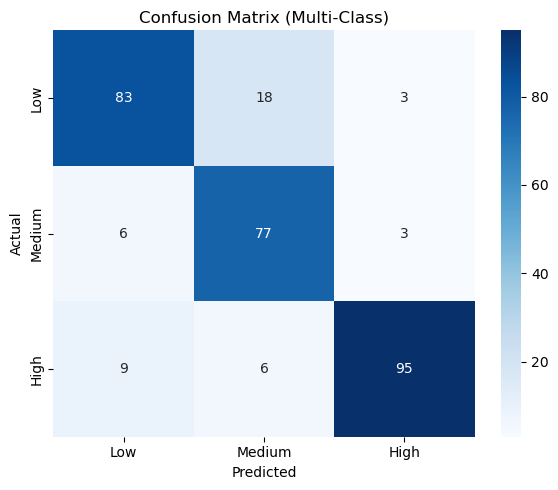

In [280]:
# Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred, labels=["Low", "Medium", "High"])
plt.figure(figsize=(6, 5))
sb.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Low", "Medium", "High"],
            yticklabels=["Low", "Medium", "High"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Multi-Class)")
plt.tight_layout()
plt.show()


 Feature Importances:
              Feature  Importance
4            Humidity    0.138377
7         Labor_Hours    0.135288
3         Temperature    0.135213
6  Energy_Consumption    0.132869
1  Schedule_Deviation    0.132179
2      Material_Usage    0.131288
5   Air_Quality_Index    0.122406
0      Accident_Count    0.072380


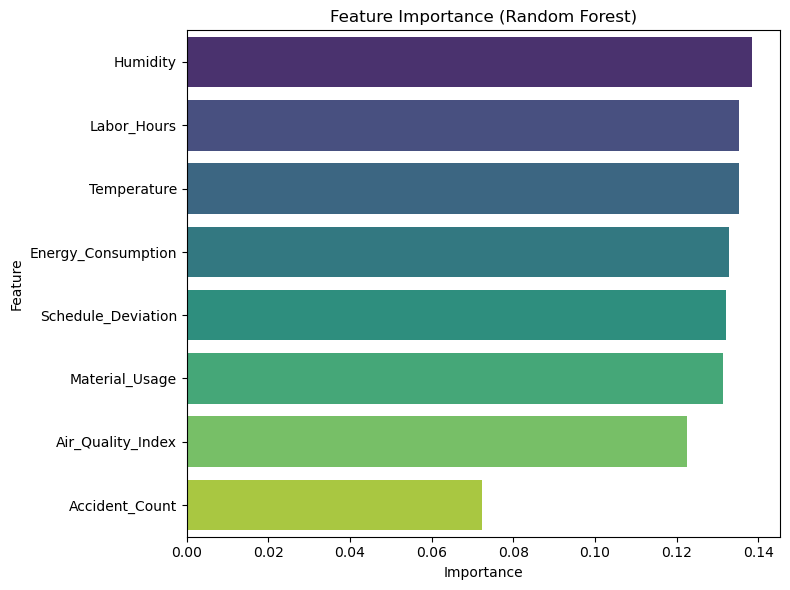

In [283]:
# Feature Importance Plot
importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\n Feature Importances:")
print(feature_importance_df)

plt.figure(figsize=(8, 6))
sb.barplot(x='Importance', y='Feature', data=feature_importance_df, palette="viridis", hue='Feature', legend=False)
plt.title("Feature Importance (Random Forest)")
plt.tight_layout()
plt.show()

### **Q2: Which project features have the strongest influence on predicting high safety risks, and how consistent are they across classification (Random Forest) and regression models?**

In [286]:
# Linear Regression Analysis on Safety Risk Score
df_reg = df.copy()

# Encode categorical variables
categorical_cols = ['Project_Type', 'Location', 'Weather_Condition']
for col in categorical_cols:
    if col in df_reg.columns:
        df_reg[col] = LabelEncoder().fit_transform(df_reg[col].astype(str))

# Drop irrelevant columns
drop_cols = ['Project_ID', 'Start_Date', 'End_Date', 'Risk_Level', 'Actual_Cost', 'Planned_Cost', 'Cost_Overrun','Accident_Count','Location']
df_reg = df_reg.drop(columns=[col for col in drop_cols if col in df_reg.columns])


In [288]:
# Define X and y
X_reg = df_reg.drop(columns=['Safety_Risk_Score'])
y_reg = df_reg['Safety_Risk_Score']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_reg)

# Train Linear Regression
model = LinearRegression()
model.fit(X_scaled, y_reg)

# Extract top coefficients
coef_series = pd.Series(model.coef_, index=X_reg.columns)
top_contributors = coef_series.abs().sort_values(ascending=False).head(10)

print("\nTop Factors Affecting Safety Risk Score:")
print(coef_series.loc[top_contributors.index])


Top Factors Affecting Safety Risk Score:
Actual_Duration         -3.960613
Planned_Duration         3.086711
Schedule_Deviation       1.573878
Load_Bearing_Capacity    0.203106
Labor_Hours             -0.156826
Image_Analysis_Score     0.142748
Temperature             -0.110494
Air_Quality_Index        0.102714
Material_Usage          -0.084015
Weather_Condition        0.047961
dtype: float64


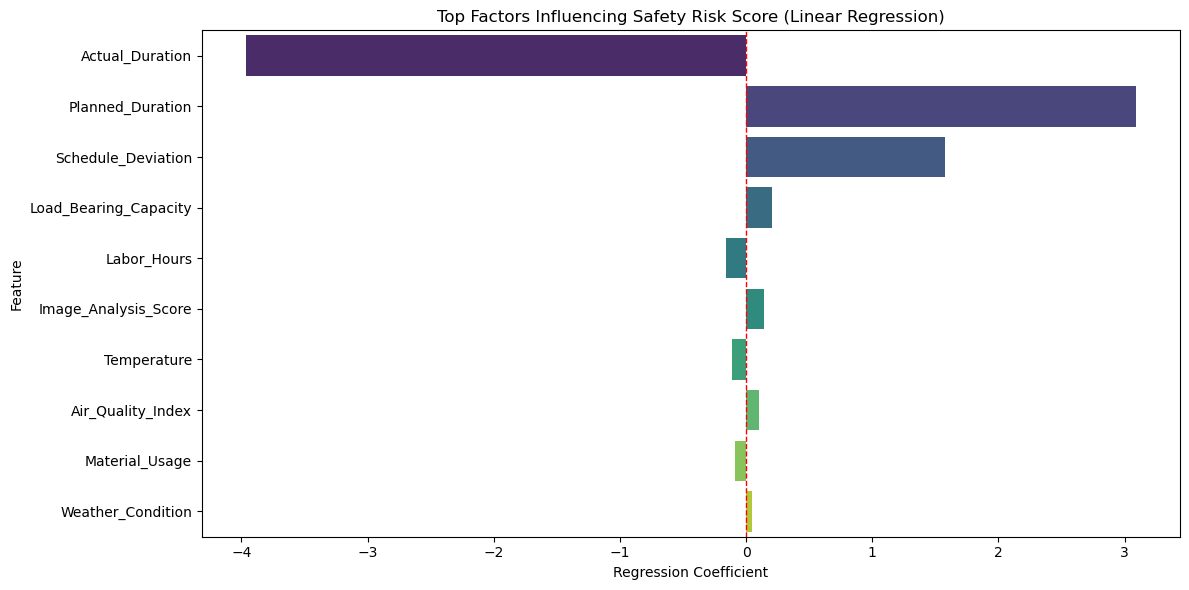

In [290]:
# Plot top factors
plt.figure(figsize=(12, 6))
sb.barplot(
    x=coef_series.loc[top_contributors.index].values,
    y=top_contributors.index,
    hue=top_contributors.index, 
    palette="viridis"
)
plt.axvline(x=0, color='red', linestyle='--', linewidth=1)  # Add vertical line at 0
plt.title("Top Factors Influencing Safety Risk Score (Linear Regression)")
plt.xlabel("Regression Coefficient")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

### **Question 3 : How do the combination of humidity and air quality affect the average safety risk score across projects?**

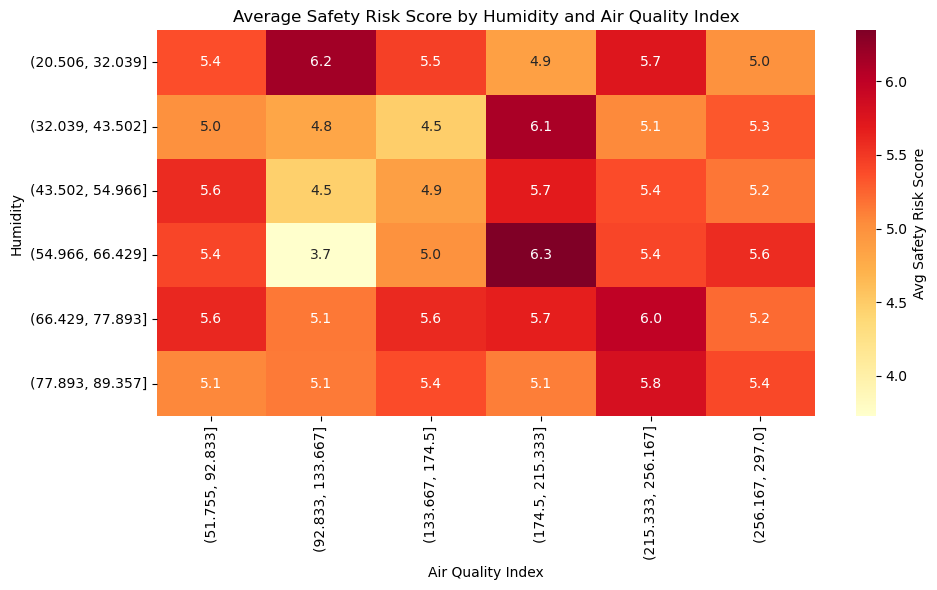

In [293]:
# Divide the  humidity and air quality index to 6 bins
read_file['Humidity_bin'] = pd.cut(read_file['Humidity'], bins=6)
read_file['AQI_bin'] = pd.cut(read_file['Air_Quality_Index'], bins=6)

# Group binned data and compute the mean Safety Risk Score
heatmap_data = read_file.groupby(['Humidity_bin', 'AQI_bin'], observed=True)['Safety_Risk_Score'].mean().unstack()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sb.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlOrRd", cbar_kws={'label': 'Avg Safety Risk Score'})
plt.title("Average Safety Risk Score by Humidity and Air Quality Index")
plt.xlabel("Air Quality Index")
plt.ylabel("Humidity")
plt.tight_layout()
plt.show()

### **Question 4  : Is there a significant difference in humidity across safety risk levels in dam and other projects?**


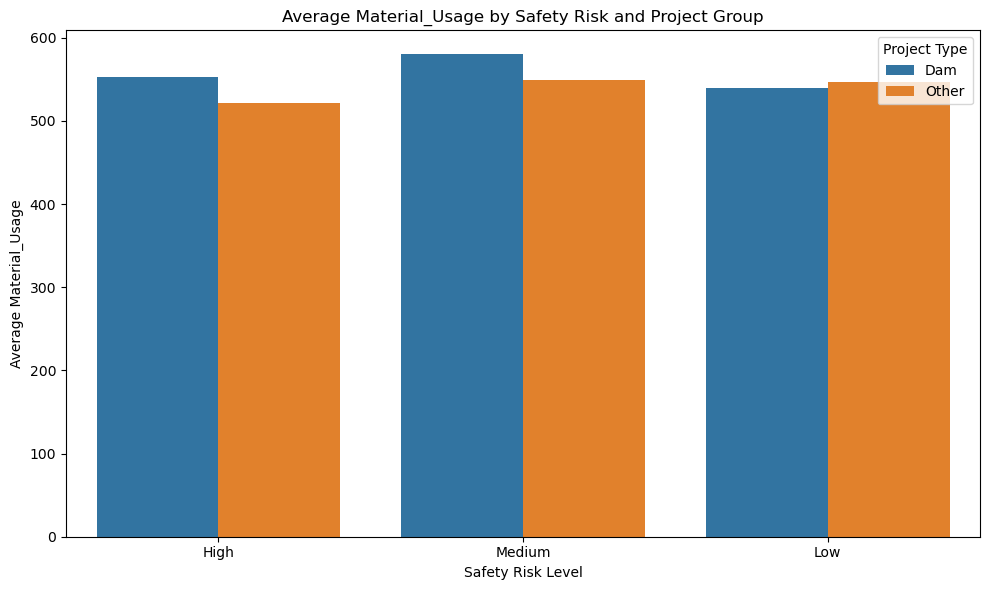

In [296]:
# Define numeric columns
numeric_cols = ['Material_Usage', 'Safety_Risk_Score']

# Create Safety Risk Levels based on quantiles
q50 = read_file['Safety_Risk_Score'].quantile(0.50)
q75 = read_file['Safety_Risk_Score'].quantile(0.75)

# Function to assign the safety risk score to their safety risk level
def assign_safety_risk(score):
    if score <= q50:
        return "Low"
    elif score <= q75:
        return "Medium"
    else:
        return "High"

# assign the safety risk score to their safety risk level
read_file['Safety_Risk'] = read_file['Safety_Risk_Score'].apply(assign_safety_risk)

# Create Dam vs Other project category
read_file['Project_Group'] = read_file['Project_Type'].apply(lambda x: 'Dam' if 'Dam' in x else 'Other')

# Group data to calculate average humidity
avg_humidity = read_file.groupby(['Safety_Risk', 'Project_Group'])['Material_Usage'].mean().reset_index()

# define the axis x order from high to medium to low(descending order of risk level)
risk_order = ['High', 'Medium', 'Low']

# Plotting bar chart
plt.figure(figsize=(10, 6))
sb.barplot(data=avg_humidity, x='Safety_Risk', y='Material_Usage', hue='Project_Group', order=risk_order)
plt.title("Average Material_Usage by Safety Risk and Project Group")
plt.xlabel("Safety Risk Level")
plt.ylabel("Average Material_Usage")
plt.legend(title="Project Type")
plt.tight_layout()
plt.show()